In [6]:
%%html
<style type='text/css'>.CodeMirror{
font-size: 18px;
</style>

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

# Linear Regression

Given data about automobiles, we'd like to predict their gasoline consumption from their engine horsepower.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def readDat(fname):
    '''
    :param fname: input file
    Assumes a first comment line is attribute names
    Other rows are attribute values
    :returns: numpy array of data, one example per row.
    '''
    with open(fname,'r') as fd:
        dat = []
        attribs = None
        for line in fd.readlines():
            if line[0] == '#': #ignore comments
                attribs = line.split()[1:]
            else:
                x = line.split()
                vals = [ float(val) for val in x ]
                dat.append( vals ) # convert to floats and append
    return attribs,np.array(dat)

In [9]:
attr,dat = readDat('auto.dat')

## Use Pandas to open Auto data

In [15]:
## Look at data
auto_dataframe = pd.DataFrame(dat,columns=attr)
#pd.plotting.scatter_matrix(auto_dataframe,figsize=(15,15),marker='0',hist_kwds={'bins':20},s=60,alpha=0.8);

In [16]:
df = auto_dataframe
df.head()

,cyl,disp,horse,weight,accel,year,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [18]:
import os

def myplot(df,xvar,yvar):
    '''plot using pandas col names'''
    plt.figure(figsize=(15,10))
    plt.rcParams.update({'font.size': 22})
    plt.scatter(df[xvar],df[yvar])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure horseVSmpg


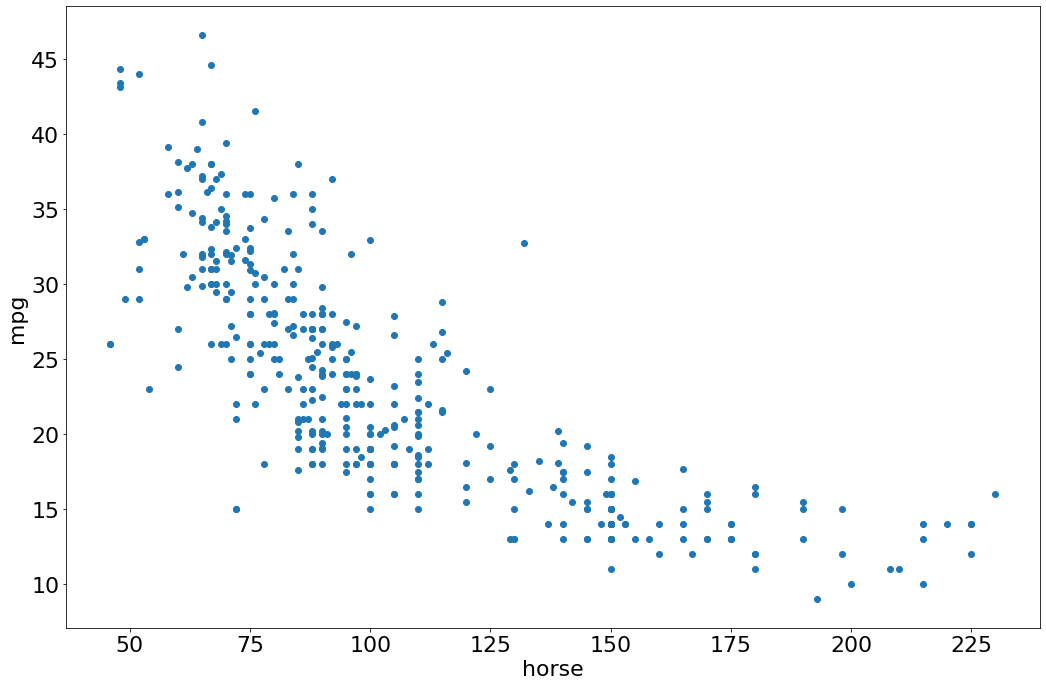

In [20]:
myplot(df,'horse','mpg')
save_fig('horseVSmpg')

## Let's fit MPG vs. horsepower using linear regression.

In [21]:
def gradStep(dat,p):
    '''
    Calculate one update of the parameters in p via gradient descent
    algorithm.
    dat: all input data
    p: parameters of linear equation to be adjusted
    '''
    sum = np.zeros(2)
    # Variables are x = x[0:2], with x[0] always equal to 1.
    for x in dat:
        sum += (np.dot(p,x[0:2]) - x[2]) * x[0:2]
    return sum / len(dat)


def cost(dat,p):
    '''Cost function (sum of squares of differences)'''
    sum = 0
    for x in dat:
        sum += ( np.dot(x[0:2], p) - x[2] )**2
    return sum / (2.0 * len(dat))

In [22]:
def gradStepStoch(dat,p,alpha):
    '''
    Calculate one update of the parameters in p via stochastic gradient descent
    algorithm.
    dat: all input data
    p: parameters of linear equation to be adjusted
    '''
    # For all data items sum term, (h(x) - y)*x 
    # Predicted value is y = x[2]
    # Variables are x = x[0:2], with x[0] always equal to 1.
    for x in dat:
        # It's critical to separate calculation of diff
        # from changes to parameters p!
        diff = np.dot(p,x[0:2]) - x[2]
        p[0] += -alpha * diff * x[0]
        p[1] += -alpha * diff * x[1]


In [64]:
def regress(dat,limit=0.001,alpha=1e-8):
    '''Use linear regression to predict col2 from col1 in dat'''
    p = np.random.rand(2) - 0.5   # two random values ((these are the parameters to determine)
   
    newp = p.copy()
    
    err = cost(dat,p)
    print(err)
    olderr = 2 * err

    while olderr - err > limit: # terminate when error change is small
        gradStepStoch(dat,p,alpha) # calculate gradient step
        olderr = err
        err = cost(dat,p) # determine cost (error)
        print('Error',err,olderr)
    print ('Parameters: ', p)

In [65]:
ndat = len(df['horse'])
bias = np.ones((ndat,1))
regressDat = np.concatenate((bias,df[['horse','mpg']].to_numpy())
                            ,axis=1)

In [66]:
regressDat[1:10]


array([[  1., 165.,  15.],
       [  1., 150.,  18.],
       [  1., 150.,  16.],
       [  1., 140.,  17.],
       [  1., 198.,  15.],
       [  1., 220.,  14.],
       [  1., 215.,  14.],
       [  1., 225.,  14.],
       [  1., 190.,  15.]])

## Plot the data and the obtained line.

In [67]:
regress(regressDat,1e-5,1e-9) # How do the estimated parameters look?

524.972817758283
Error 520.9242936900183 524.972817758283
Error 516.9149210744682 520.9242936900183
Error 512.9443213295192 516.9149210744682
Error 509.01211953365754 512.9443213295192
Error 505.117944390578 509.01211953365754
Error 501.2614281941259 505.117944390578
Error 497.4422067935886 501.2614281941259
Error 493.65991955931685 497.4422067935886
Error 489.9142093486778 493.65991955931685
Error 486.2047224723411 489.9142093486778
Error 482.5311086608868 486.2047224723411
Error 478.8930210317412 482.5311086608868
Error 475.29011605642467 478.8930210317412
Error 471.7220535281274 475.29011605642467
Error 468.1884965295844 471.7220535281274
Error 464.68911140127574 468.1884965295844
Error 461.22356770992184 464.68911140127574
Error 457.79153821729324 461.22356770992184
Error 454.3926988493145 457.79153821729324
Error 451.02672866547175 454.3926988493145
Error 447.69330982851267 451.02672866547175
Error 444.3921275744433 447.69330982851267
Error 441.1228701828086 444.3921275744433
Erro

Error 141.4794645877037 141.82235452664415
Error 141.13989199301727 141.4794645877037
Error 140.80360465770806 141.13989199301727
Error 140.47057080717144 140.80360465770806
Error 140.1407589740731 140.47057080717144
Error 139.81413799537899 140.1407589740731
Error 139.4906770094121 139.81413799537899
Error 139.17034545293913 139.4906770094121
Error 138.8531130582847 139.17034545293913
Error 138.53894985047225 138.8531130582847
Error 138.22782614439504 138.53894985047225
Error 137.91971254201317 138.22782614439504
Error 137.61457992957702 137.91971254201317
Error 137.31239947487867 137.61457992957702
Error 137.01314262452942 137.31239947487867
Error 136.7167811012642 137.01314262452942
Error 136.4232869012706 136.7167811012642
Error 136.13263229154566 136.4232869012706
Error 135.8447898072766 136.13263229154566
Error 135.55973224924773 135.8447898072766
Error 135.2774326812728 135.55973224924773
Error 134.9978644276503 135.2774326812728
Error 134.72100107064583 134.9978644276503
Error 

Error 111.81203578679575 111.86502834630339
Error 111.75955634167998 111.81203578679575
Error 111.70758504575868 111.75955634167998
Error 111.65611698186135 111.70758504575868
Error 111.60514728037985 111.65611698186135
Error 111.55467111880795 111.60514728037985
Error 111.5046837212872 111.55467111880795
Error 111.45518035815445 111.5046837212872
Error 111.40615634549579 111.45518035815445
Error 111.35760704470366 111.40615634549579
Error 111.30952786203919 111.35760704470366
Error 111.26191424819812 111.30952786203919
Error 111.21476169788076 111.26191424819812
Error 111.1680657493672 111.21476169788076
Error 111.12182198409477 111.1680657493672
Error 111.07602602624142 111.12182198409477
Error 111.03067354231241 111.07602602624142
Error 110.9857602407304 111.03067354231241
Error 110.94128187143086 110.9857602407304
Error 110.89723422545978 110.94128187143086
Error 110.85361313457726 110.89723422545978
Error 110.81041447086216 110.85361313457726
Error 110.76763414632315 110.810414470

Error 106.78980954000973 106.79366685257772
Error 106.78598966116515 106.78980954000973
Error 106.7822068530215 106.78598966116515
Error 106.77846075607232 106.7822068530215
Error 106.77475101429174 106.77846075607232
Error 106.77107727510152 106.77475101429174
Error 106.7674391893378 106.77107727510152
Error 106.76383641121787 106.7674391893378
Error 106.76026859830728 106.76383641121787
Error 106.75673541148778 106.76026859830728
Error 106.75323651492467 106.75673541148778
Error 106.749771576036 106.75323651492467
Error 106.74634026545993 106.749771576036
Error 106.7429422570249 106.74634026545993
Error 106.73957722771694 106.7429422570249
Error 106.73624485765129 106.73957722771694
Error 106.73294483004034 106.73624485765129
Error 106.72967683116434 106.73294483004034
Error 106.72644055034212 106.72967683116434
Error 106.72323567990115 106.72644055034212
Error 106.72006191514798 106.72323567990115
Error 106.71691895434093 106.72006191514798
Error 106.71380649865979 106.7169189543409

Error 106.42384778309193 106.4241214350064
Error 106.423576751335 106.42384778309193
Error 106.42330831411265 106.423576751335
Error 106.42304244605184 106.42330831411265
Error 106.42277912202518 106.42304244605184
Error 106.42251831715022 106.42277912202518
Error 106.42226000678663 106.42251831715022
Error 106.42200416653316 106.42226000678663
Error 106.42175077222647 106.42200416653316
Error 106.42149979993744 106.42175077222647
Error 106.42125122597058 106.42149979993744
Error 106.42100502686027 106.42125122597058
Error 106.42076117936898 106.42100502686027
Error 106.42051966048565 106.42076117936898
Error 106.42028044742297 106.42051966048565
Error 106.4200435176148 106.42028044742297
Error 106.4198088487151 106.4200435176148
Error 106.41957641859487 106.4198088487151
Error 106.41934620534047 106.41957641859487
Error 106.41911818725136 106.41934620534047
Error 106.4188923428383 106.41911818725136
Error 106.41866865082078 106.4188923428383
Error 106.41844709012555 106.41866865082078

Error 106.39681394701996 106.39683834725851
Error 106.3967897128721 106.39681394701996
Error 106.39676564313395 106.3967897128721
Error 106.39674173614075 106.39676564313395
Error 106.39671799024472 106.39674173614075
Error 106.39669440381375 106.39671799024472
Error 106.3966709752326 106.39669440381375
Error 106.39664770290135 106.3966709752326
Error 106.39662458523618 106.39664770290135
Error 106.3966016206691 106.39662458523618
Error 106.39657880764736 106.3966016206691
Error 106.39655614463385 106.39657880764736
Error 106.39653363010616 106.39655614463385
Error 106.39651126255751 106.39653363010616
Error 106.39648904049581 106.39651126255751
Error 106.39646696244387 106.39648904049581
Error 106.39644502693865 106.39646696244387
Error 106.39642323253213 106.39644502693865
Error 106.39640157779066 106.39642323253213
Error 106.39638006129427 106.39640157779066
Error 106.3963586816374 106.39638006129427
Error 106.39633743742841 106.3963586816374
Error 106.39631632728965 106.39633743742

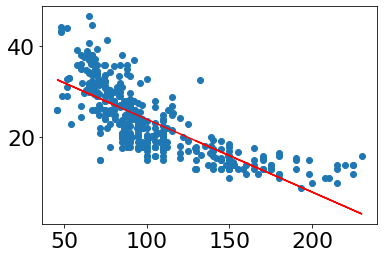

In [73]:
x= regressDat[:,1]
plt.scatter(x,regressDat[:,2])
plt.plot(x, 40 + -.16*x,'r')

## Is this correct?  Can you fix it?